# Leaf StyleGAN

Generation of images, processing into unit cells, and exploration of latent space with Nvidia's StyleGAN  

Markus J Buehler, MIT, 2021 
Edits by Sabrina Shen, MIT, 2022

Shen, S.C., Buehler, M.J. Nature-inspired Architected materials using unsupervised deep learning. Accepted (2022).

In [1]:
import os,sys

#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import matplotlib.pyplot as plt

import numpy as np
import cv2
import PIL 
from PIL import Image, ImageOps, ImageFilter
import skimage.io
import skimage.filters
import pandas as pd

import seaborn as sns

import ImageTools
import vox2STL

import csv
from numpy import genfromtxt

#Target res:  1024×1024

#!pip install ninja opensimplex torch==1.7.1 torchvision==0.8.2

## Setup

In [2]:
!nvidia-smi -L

GPU 0: Quadro RTX 5000 (UUID: GPU-78162963-0a30-bd79-76cb-1dd6b2a4206c)


## Generate a set of images based on random seeds

In [13]:
#Create a library of 1000 images based on random seeds

#!python generate.py --outdir=./bone_leaf/bw_1000/images/ --trunc=1.0 --seeds=0-1000 --network=./bone_leaf/network-snapshot-bw-001240.pkl

#!python generate.py --outdir=./bone_leaf/equalized_1000_6960/images/ --trunc=1.0 --seeds=0-1000 --network=./bone_leaf/network-snapshot-equalized-006960.pkl

!python generate.py --outdir=./MD/5000-6000/images/ --trunc=1.0 --seeds=5000-9999 --network=./leaf-network-snapshot.pkl


Loading networks from "./leaf-network-snapshot.pkl"...
Generating image for seed 5000 (0/5000) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 5001 (1/5000) ...
Generating image for seed 5002 (2/5000) ...
Generating image for seed 5003 (3/5000) ...
Generating image for seed 5004 (4/5000) ...
Generating image for seed 5005 (5/5000) ...
Generating image for seed 5006 (6/5000) ...
Generating image for seed 5007 (7/5000) ...
Generating image for seed 5008 (8/5000) ...
Generating image for seed 5009 (9/5000) ...
Generating image for seed 5010 (10/5000) ...
Generating image for seed 5011 (11/5000) ...
Generating image for seed 5012 (12/5000) ...
Generating image for seed 5013 (13/5000) ...
Generating image for seed 5014 (14/5000) ...
Generating image for seed 5015 (15/5000) ...
Generating image for seed 5016 (16/5000) ...
Generating image for seed 5017 (17/5000) ...
Generating image for seed 5018 (18/500

In [9]:
# Process images into unit cells
#Use mirrorcopy>1 to create larger-area architectures with repeated unit cells

#path='./bone_leaf/equalized_1000_6960/images/'
#dest='./bone_leaf/equalized_1000_6960/unit/'

path='./bone_leaf/style_mixing/test/'
dest='./bone_leaf/style_mixing/test/unit/'

names, seeds, density=ImageTools.remove_small (path, dest, 20000, 1024,mirrorcopy=1, ressfinal=256, filt1=32, thicken=2, rect=0)

111-111.png
Thickening resulting structure using dilation...iterations:  2
number white:  41720 density:  0.6365966796875
111-139.png
Thickening resulting structure using dilation...iterations:  2
number white:  35184 density:  0.536865234375
139-139.png
Thickening resulting structure using dilation...iterations:  2
number white:  22892 density:  0.34930419921875
139-540.png
Thickening resulting structure using dilation...iterations:  2
number white:  22616 density:  0.3450927734375
540-540.png
Thickening resulting structure using dilation...iterations:  2
number white:  48012 density:  0.73260498046875
87-87.png
Thickening resulting structure using dilation...iterations:  2
number white:  29352 density:  0.4478759765625
Picture2.png
Thickening resulting structure using dilation...iterations:  2
number white:  19256 density:  0.2938232421875
Picture3.png
Thickening resulting structure using dilation...iterations:  2
number white:  29128 density:  0.4444580078125
Picture4.png
Thickening

C:\Users\sabri\.conda\envs\stylegan2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Density'), Text(0, 0.5, 'Count')]

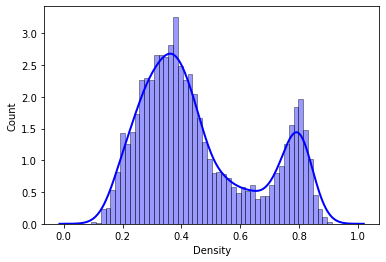

In [9]:
#Density data

maxindex = np.argmax(density)
minindex = np.argmin(density)

dens=np.asarray(np.stack((np.asarray(density),np.asarray(seeds)), axis=1))
dens_df=pd.DataFrame(dens, columns=['Density', 'Seed'])

# seaborn histogram
h=sns.distplot(density, hist=True, kde=True, 
             bins=50, color = 'blue',
             hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 2})
h.set(xlabel="Density", ylabel="Count")

In [15]:
df = pd.DataFrame(density) 
    
# saving the dataframe 
df.to_csv('./MD/5000-6000/density.csv', header=['density'], index_label=['unit'] ) 

# Generate gradients

In [ ]:
#generate from points in CSV file

#use frames for number of steps between points in the CSV file; more frames=smoother interpolation
!python generate.py --outdir=./output_leaf/gradient/frames/ --trunc=.7 --process="interpolation" --interpolation="2Dpoint_CSV" --csvfile=./gradient.csv --frames=40 --random_seed=0 --seeds=441,593,863 --network=./leaf-network-snapshot.pkl 

#process into unit cells
path = "./output_leaf/gradient/frames/" 
dest="./output_leaf/gradient/processed/"

names, seeds, density=remove_small (path, dest, 30000, 1024,mirrorcopy=1, ressfinal=512, filt1=32, thicken=2, rect=0)

In [ ]:
#now stack in x-y
path ="./output_leaf/gradient/processed/"
dest ="./output_leaf/gradient/stack/"

stack_xy(path, dest, ress=96, mirrorcopy=0, ressfinal=1024, xcopy=0, ycopy=4, dir=1, thicken=0, rect=0) 

In [11]:
#or stack in z into 3d stl model
import vox2STL
vox1=vox2STL.img2vox('./output_leaf/gradient/processed_3d/', 'png')

vox2STL.vox2stl(vox1, filename='leaf_architected')

found 512 images. ['./output_leaf/gradient/processed_3d\\0.png', './output_leaf/gradient/processed_3d\\1.png', './output_leaf/gradient/processed_3d\\2.png', './output_leaf/gradient/processed_3d\\3.png', './output_leaf/gradient/processed_3d\\4.png', './output_leaf/gradient/processed_3d\\5.png', './output_leaf/gradient/processed_3d\\6.png', './output_leaf/gradient/processed_3d\\7.png', './output_leaf/gradient/processed_3d\\8.png', './output_leaf/gradient/processed_3d\\9.png', './output_leaf/gradient/processed_3d\\10.png', './output_leaf/gradient/processed_3d\\11.png', './output_leaf/gradient/processed_3d\\12.png', './output_leaf/gradient/processed_3d\\13.png', './output_leaf/gradient/processed_3d\\14.png', './output_leaf/gradient/processed_3d\\15.png', './output_leaf/gradient/processed_3d\\16.png', './output_leaf/gradient/processed_3d\\17.png', './output_leaf/gradient/processed_3d\\18.png', './output_leaf/gradient/processed_3d\\19.png', './output_leaf/gradient/processed_3d\\20.png', './o

save stl model to ./leaf_architected.stl


## Style Mixing

In [25]:
!python style_mixing.py --outdir=./bone_leaf/style_mixing --rows=206,358,817,87,139 --cols=206,358,817,87,139 --styles=6-11 --network=./bone_leaf/network-snapshot-equalized-004120.pkl
#!python style_mixing.py --outdir=./bone_leaf/style_mixing --rows=64,72,103,111,540,738 --cols=64,72,111,103,540,738,87,139,206,358,787,817 --styles=0-5 --network=./bone_leaf/network-snapshot-bw-001240.pkl

Loading networks from "./bone_leaf/network-snapshot-equalized-004120.pkl"...
Generating W vectors...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Generating images...
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating style-mixed images...
Saving images...
Saving image grid...


# Generate cirular/spiral

In [ ]:
 !python generate.py --outdir=./output_leaf/circularloop_spiral/ --trunc=.7 --process="interpolation" --interpolation="circularloop_spiral" --diameter=.1 --frames=10 --random_seed=90 --seeds=0,17,68 --numberrotations=50 --d_inc_rotation=.5 --network=./leaf-network-snapshot-000092.pkl

In [ ]:
path = "./output_leaf/circularloop_spiral/frames/" 
dest="./output_leaf/circularloop_spiral/processed/"
remove_small (path, dest, 10000, 1024,mirrorcopy=1)

# Translate image stacks to STL and other manipulations

In [15]:
#Import Michael's tool to convert voxel to STL
import vox2STL

In [17]:
# first parameter: Folder with image stacks
vox1=vox2STL.img2vox('./output_leaf/gradient/processed/', 'png')

vox2STL.vox2stl(vox1, filename='leaf_architected')


found 16 images. ['./output_leaf/gradient/processed\\0000_smoothed.png', './output_leaf/gradient/processed\\0001_smoothed.png', './output_leaf/gradient/processed\\0002_smoothed.png', './output_leaf/gradient/processed\\0003_smoothed.png', './output_leaf/gradient/processed\\0004_smoothed.png', './output_leaf/gradient/processed\\0005_smoothed.png', './output_leaf/gradient/processed\\0006_smoothed.png', './output_leaf/gradient/processed\\0007_smoothed.png', './output_leaf/gradient/processed\\0008_smoothed.png', './output_leaf/gradient/processed\\0009_smoothed.png', './output_leaf/gradient/processed\\0010_smoothed.png', './output_leaf/gradient/processed\\0011_smoothed.png', './output_leaf/gradient/processed\\0012_smoothed.png', './output_leaf/gradient/processed\\0013_smoothed.png', './output_leaf/gradient/processed\\0014_smoothed.png', './output_leaf/gradient/processed\\0015_smoothed.png']
save stl model to ./leaf_architected.stl


In [ ]:
# For multimaterial printing, generate inverse of first mesh

vox40=vox2STL.inverse(vox1)  
vox2STL.vox2stl(vox40, filename='leaf_architected_inverse')
 

In [ ]:
# first parameter: Folder with image stacks
vox10=vox2STL.img2vox('./output_leaf/temp3/processed_xstitc/', 'png')

vox2STL.vox2stl(vox10, filename='leaf_architected_single')


In [ ]:
# For multimaterial printing, generate inverse of first mesh

vox40=vox2STL.inverse(vox10)  
vox2STL.vox2stl(vox40, filename='leaf_architected_single_inverse')
 

# Img2Architecture

In [2]:
filename='curve.png'
label='curve'

csv_label="./img_to_architecture_"+label+".csv"
outdir_label="./output_leaf/img_to_architecture/"+label+"/"

In [3]:
#Convert image into 16x16 binary array
image_file = Image.open(filename)

if len(np.asarray(image_file).shape)==2:
    gray = image_file.resize((16,16))
elif np.asarray(image_file).shape[2]==4:
    image_file.load()
    rgb = Image.new("RGB", image_file.size, (255, 255, 255))
    rgb.paste(image_file, mask = image_file.split()[3])
    gray=rgb.convert("L").resize((16,16))
elif np.asarray(image_file).shape[2]==3:
    gray = image_file.convert("L").resize((16,16))
elif np.asarray(image_file).shape[2]==1:
    gray = image_file.resize((16,16))
    
gray = gray.transpose(Image.FLIP_LEFT_RIGHT)
threshold = np.asarray(gray).mean()
bw = gray.point(lambda p: p > threshold and 255)  
bw.save("bw.png", format="png")
pixels_bw = np.asarray(bw)

In [4]:
#Use gaussian blur to ensure smooth interpolation
gaussian = bw.filter(ImageFilter.GaussianBlur(1))
np.asarray(gaussian)
gaussian.save("gaussian.png", format="png")
#gaussian.show()

normalized = ImageTools.NormalizeData(np.asarray(gaussian))

In [5]:
#Create csv file with points for image generation
csv_points=np.stack((normalized.reshape((256,)), np.zeros(256)), axis=1)
pd.DataFrame(csv_points).to_csv(csv_label, header=['x','y'], index=False)

In [ ]:
#generate images
!python generate.py --outdir=./output_leaf/img_to_architecture/curve/ --trunc=.7 --frames=1 --random_seed=0 --process="interpolation" --interpolation="2Dpoint_CSV" --csvfile=./img_to_architecture_curve.csv --seeds=441,863,68   --network=leaf-network-snapshot.pkl 

#process into unit cells
path = "output_leaf/img_to_architecture/"+label+"/frames/" 
dest="output_leaf/img_to_architecture/"+label+"/processed/"

names, seeds, density=ImageTools.remove_small(path, dest, 30000, 1024,mirrorcopy=1, ressfinal=256, filt1=32, thicken=0, rect=0)

#stack
path="./output_leaf/img_to_architecture/"+label+"/processed/"
dest="./output_leaf/img_to_architecture/"+label+"/stack/"
stack_xy(path2 = path, dest=dest, ress=96, ressfinal=4096, thicken=2, rect=0, destfile=None)

# other example operations

In [ ]:
vox3=vox2STL.union(vox1, vox10)
vox2STL.vox2stl(vox3, filename='union')

vox3=vox2STL.xor(vox1, vox10)
vox2STL.vox2stl(vox3, filename='xor')

vox3=vox2STL.substraction(vox1, vox10)
vox2STL.vox2stl(vox3, filename='sub')

vox3=vox2STL.intersection(vox1, vox10)  
vox2STL.vox2stl(vox3, filename='inter')



In [ ]:
#repeat mesh 
# repeat in z, y, x
vox3=vox2STL.repeat(vox10, [1, 2, 2])  

print ("Done with repeat...")
fname='repeat'

vox2STL.vox2stl(vox3, filename='repeat')
